[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-01.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools.kyoulee_tools import *

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 수치형 변수를 범주형 변수로 만들기


In [4]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [5]:
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

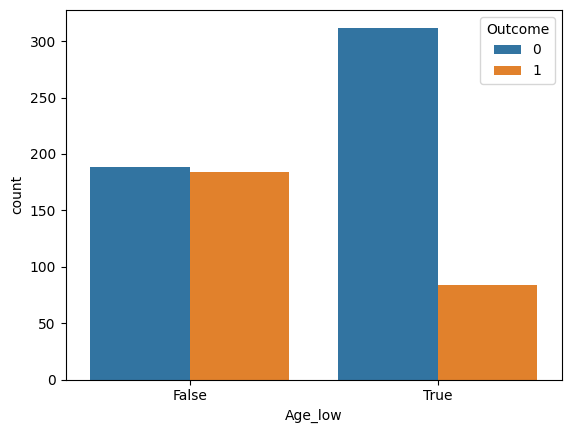

In [6]:
sns.countplot(data=df, x="Age_low", hue="Outcome")

## 결측치 다루기

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head(5)

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [10]:
print(df["Insulin_nan"].isnull().sum(), df["Insulin_nan"].isnull().mean())

374 0.4869791666666667


In [11]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].mean()

,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [12]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].describe()

Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

## 결측치 채우기
결과값에 따라 따로 추가하여 만들기

In [13]:

df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130


## 학습, 예측 데이터셋 나누기

In [14]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [15]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(614, 14)

In [16]:
test = df[split_count:].copy()
test.shape

(154, 14)

## 학습, 예측에 사용할 컬럼

In [17]:
feature_names = train.columns.tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high',
 'Insulin_nan']

In [18]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age")
feature_names.remove("Insulin")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies_high',
 'Insulin_nan']

## 정답값이자 예측해야 될 값

In [19]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [20]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 7)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Pregnancies_high,Insulin_nan
0,148,72,35,33.6,0.627,False,206.0
1,85,66,29,26.6,0.351,False,130.0
2,183,64,0,23.3,0.672,True,206.0
3,89,66,23,28.1,0.167,False,94.0
4,137,40,35,43.1,2.288,False,168.0


In [21]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 7)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Pregnancies_high,Insulin_nan
614,138,74,26,36.1,0.557,True,144.0
615,106,72,0,25.8,0.207,False,130.0
616,117,96,0,28.7,0.157,False,130.0
617,68,62,13,20.1,0.257,False,15.0
618,112,82,24,28.2,1.282,True,206.0


In [23]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [26]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

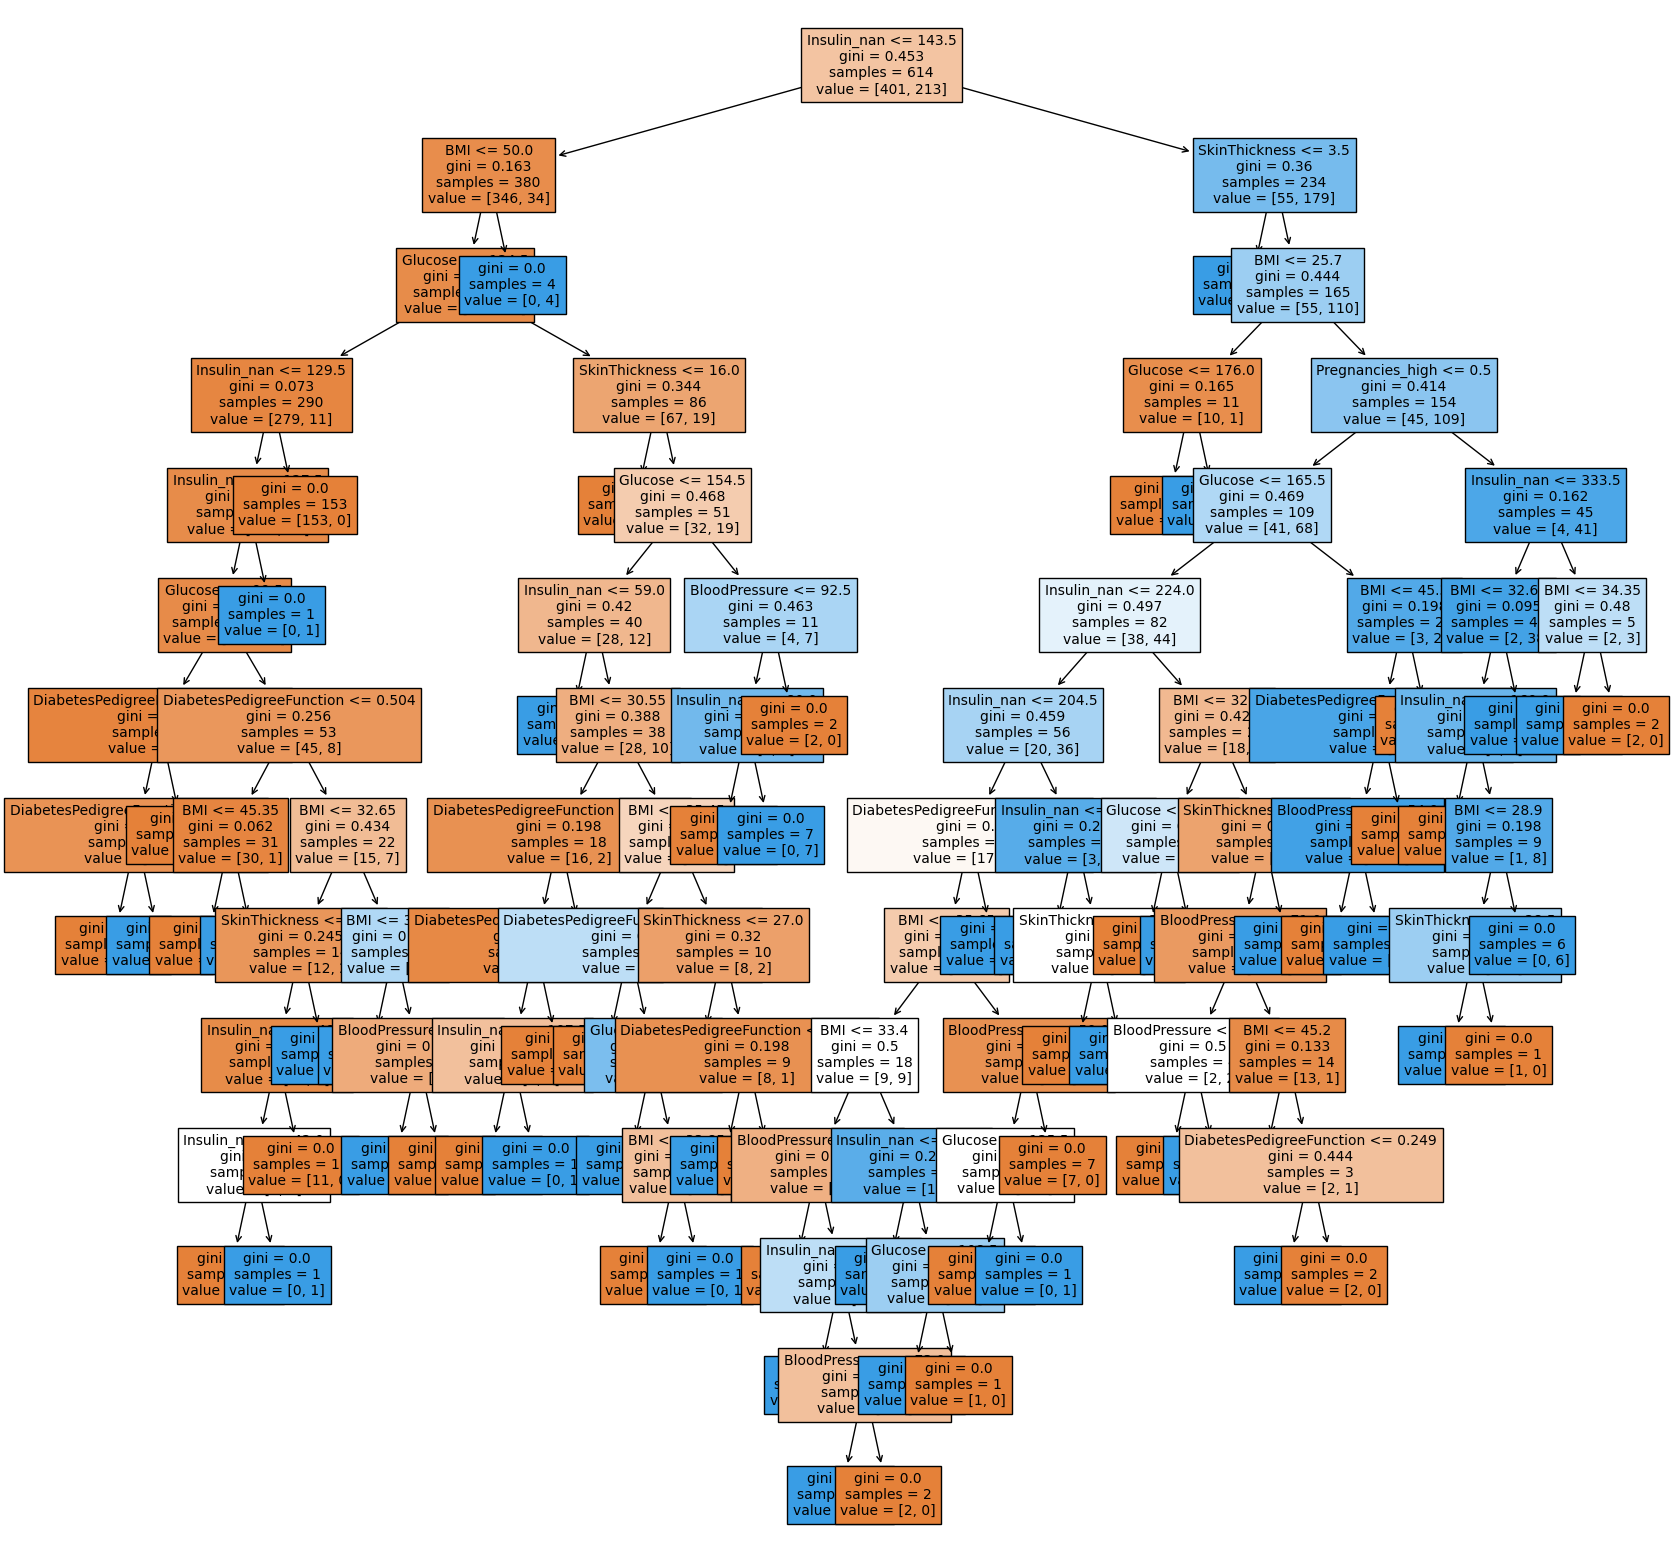

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [28]:
# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [29]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.07808479, 0.04535074, 0.09067429, 0.13393298, 0.06759254,
       0.01889325, 0.56547141])

<Axes: >

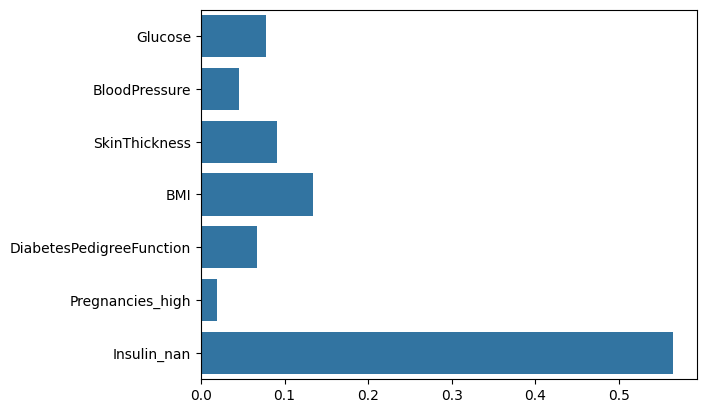

In [30]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도(Accuracy) 측정하기

In [31]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
diff_count

25

In [32]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100

83.76623376623377

In [33]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

83.76623376623377

In [34]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

83.76623376623377